<a href="https://colab.research.google.com/github/SRavenel/Project-1---NYC-School-Data/blob/main/python_project1_sr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
This analysis will look at NYC Public School Regents Data to compare percentages of students in K-8 scoring 80% or higher on the 2015 Living Environment Regents Exam.
First, we import libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

Now we import CSV file

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

Take a quick look at raw data

In [ ]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


Since we only want to compare the number of students scoring above 80, let's remove uneccessary columns.

In [ ]:
drop_cols = ['Number Scoring CR', 'Percent Scoring CR', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Percent Scoring 80 or Above' ]

In [ ]:
df.drop(drop_cols, inplace = True, axis=1)

Check new dataframe to confirm wanted columns have remained.

In [ ]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,7
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s
...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s


Now onto filtering rows out.

In [ ]:
df2 = df[(df['School Level']=='K-8') & (df['Year']==2015) & (df['Regents Exam']=='Living Environment')] 

In [ ]:
df2

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,7
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0
2379,03M180,P.S. 180 Hugo Newman,K-8,Living Environment,2015,24,2
2482,03M334,The Anderson School,K-8,Living Environment,2015,64,64
2881,04M007,P.S. 007 Samuel Stern,K-8,Living Environment,2015,17,15
...,...,...,...,...,...,...,...
212302,84X705,Family Life Academy Charter School,K-8,Living Environment,2015,5,s
212303,84X705,Family Life Academy Charter School,K-8,Living Environment,2015,16,s
212316,84X706,Harriet Tubman Charter School,K-8,Living Environment,2015,1,s
212324,84X717,Icahn Charter School,K-8,Living Environment,2015,8,2


According to the original site, there are some cells missing data (labeled "s") due to confidentiality. Let's remove these.

In [ ]:
df3 = df2[df2['Number Scoring 80 or Above']!='s']

In [ ]:
df3

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,7
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0
2379,03M180,P.S. 180 Hugo Newman,K-8,Living Environment,2015,24,2
2482,03M334,The Anderson School,K-8,Living Environment,2015,64,64
2881,04M007,P.S. 007 Samuel Stern,K-8,Living Environment,2015,17,15
...,...,...,...,...,...,...,...
211426,84X378,Icahn Charter School 2,K-8,Living Environment,2015,8,6
211613,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,18,5
211614,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,32,7
212324,84X717,Icahn Charter School,K-8,Living Environment,2015,8,2


In [ ]:
df3.sort_values(["School Name"]).head(15)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
211614,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,32,7
211613,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,18,5
139428,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,19,7
53820,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,43,11
53821,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,7,1
139427,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,31,5
19240,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,50,12
102280,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,14,3
102278,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,6,0
102279,84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,30,9


Now that we have cleaner data, I can also see there are some duplicated rows in terms of school names. Let's combine these rows summing the Total Tested and Number Scoring 80 or Above,

In [ ]:
df3.dtypes

School DBN                    object
School Name                   object
School Level                  object
Regents Exam                  object
Year                           int64
Total Tested                   int64
Number Scoring 80 or Above    object
dtype: object

In [ ]:
df3["Number Scoring 80 or Above"].astype(np.int64)

1          7
5          0
2379       2
2482      64
2881      15
          ..
211426     6
211613     5
211614     7
212324     2
212325     2
Name: Number Scoring 80 or Above, Length: 297, dtype: int64

In [ ]:
df3.astype({'Number Scoring 80 or Above':'int32'}).dtypes

School DBN                    object
School Name                   object
School Level                  object
Regents Exam                  object
Year                           int64
Total Tested                   int64
Number Scoring 80 or Above     int32
dtype: object

In [ ]:
df4= df3.astype({'Number Scoring 80 or Above':'int32'})

Test to make sure column type change worked.

In [ ]:
df4.dtypes

School DBN                    object
School Name                   object
School Level                  object
Regents Exam                  object
Year                           int64
Total Tested                   int64
Number Scoring 80 or Above     int32
dtype: object

Now we can proceed with combining row data.

In [ ]:
df5 = df4.groupby(['School DBN', 'School Name','School Level', 'Regents Exam', 'Year']).sum()

In [ ]:
df5.sort_values(["School Name"]).head(20) 

,,,,,Total Tested,Number Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,
84X419,Bronx Academy of Promise Charter School,K-8,Living Environment,2015,250,60
84K593,Excellence Boys Charter School,K-8,Living Environment,2015,188,97
84X705,Family Life Academy Charter School,K-8,Living Environment,2015,63,15
27Q333,Goldie Maple Academy,K-8,Living Environment,2015,64,26
24Q119,I.S. 119 The Glendale,K-8,Living Environment,2015,473,426
84X717,Icahn Charter School,K-8,Living Environment,2015,70,20
84X378,Icahn Charter School 2,K-8,Living Environment,2015,62,48
84K608,Kings Collegiate Charter School,K-8,Living Environment,2015,300,150
17K394,M.S. K394,K-8,Living Environment,2015,63,24


Let's calculate the new precentage for students scoring 80 or Above per school.

In [ ]:
df5['New Percent Scoring 80 or Above'] = df5['Number Scoring 80 or Above']/df5['Total Tested']*100

In [ ]:
df5.head()

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,70,32,45.714286
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0,0.000000
03M180,P.S. 180 Hugo Newman,K-8,Living Environment,2015,90,7,7.777778
03M334,The Anderson School,K-8,Living Environment,2015,248,248,100.000000
04M007,P.S. 007 Samuel Stern,K-8,Living Environment,2015,34,30,88.235294


*Here we can see a total of 51 schools that administered the Living Environment Regent in 2015.

In [ ]:
df5.describe()

,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
count,51.000000,51.000000,51.000000
mean,146.862745,78.568627,48.730971
std,112.600714,96.815134,33.157798
min,9.000000,0.000000,0.000000
25%,70.000000,15.000000,19.859877
50%,116.000000,48.000000,49.514563
75%,155.000000,107.500000,79.094293
max,479.000000,427.000000,100.000000


In [ ]:
df5.sort_values(["New Percent Scoring 80 or Above"])

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0,0.000000
23K137,P.S./I.S. 137 Rachel Jean Mitchell,K-8,Living Environment,2015,62,0,0.000000
05M129,P.S. 129 John H. Finley,K-8,Living Environment,2015,37,0,0.000000
29Q138,P.S./M.S. 138 Sunrise,K-8,Living Environment,2015,479,5,1.043841
21K238,P.S. 238 Anne Sullivan,K-8,Living Environment,2015,109,4,3.669725
10X037,P.S. X037 - Multiple Intelligence School,K-8,Living Environment,2015,285,11,3.859649
27Q105,P.S. 105 The Bay School,K-8,Living Environment,2015,76,3,3.947368
07X029,P.S./M.S. 029 Melrose School,K-8,Living Environment,2015,116,8,6.896552
03M180,P.S. 180 Hugo Newman,K-8,Living Environment,2015,90,7,7.777778


Now that we have cleaned our data, we can use it to perform some comparisons.

This bar graph data is inconclusive. Let's try something different.

<Axes: ylabel='Frequency'>

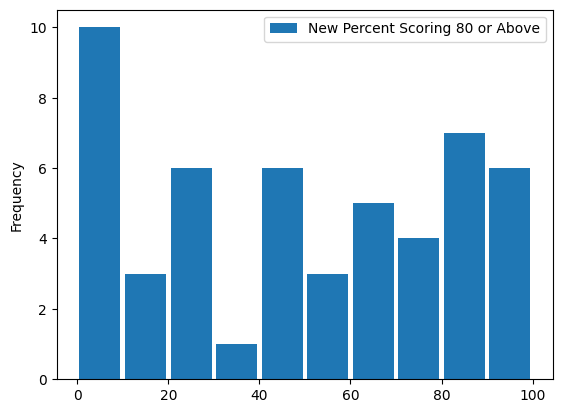

In [ ]:
df5.plot(kind='hist', x='Total Tested', y= 'New Percent Scoring 80 or Above', rwidth=.9)

This scatter plot shows a general distribution with no focussed correlation between number of students tested to Percent of them testing 80 or Above.
One thing found here is majorty of schools tested between 50-200 students.

Text(0, 0.5, 'Percent Scoring 80 or Above')

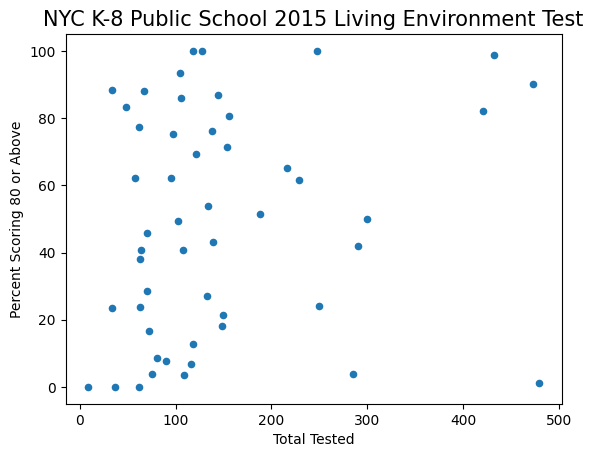

In [ ]:
df5.plot(kind='scatter', x='Total Tested', y= 'New Percent Scoring 80 or Above')
plt.title("NYC K-8 Public School 2015 Living Environment Test",fontsize=15)
plt.ylabel("Percent Scoring 80 or Above")

Top-5 for Number of students Tested

In [ ]:
df5.sort_values(["Total Tested"], ascending = False).head(5)

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
29Q138,P.S./M.S. 138 Sunrise,K-8,Living Environment,2015,479,5,1.043841
24Q119,I.S. 119 The Glendale,K-8,Living Environment,2015,473,426,90.063425
30Q122,P.S. 122 Mamie Fay,K-8,Living Environment,2015,432,427,98.842593
18K235,P.S. 235 Janice Marie Knight School,K-8,Living Environment,2015,421,346,82.185273
84K608,Kings Collegiate Charter School,K-8,Living Environment,2015,300,150,50.000000


Bottom=5 for Number of students Tested

In [ ]:
df5.sort_values(["Total Tested"], ascending = True).head(5)

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0,0.000000
04M007,P.S. 007 Samuel Stern,K-8,Living Environment,2015,34,30,88.235294
27Q114,P.S./M.S. 114 Belle Harbor,K-8,Living Environment,2015,34,8,23.529412
05M129,P.S. 129 John H. Finley,K-8,Living Environment,2015,37,0,0.000000
17K189,P.S. 189 The Bilingual Center,K-8,Living Environment,2015,48,40,83.333333


**Five worst performing schools.**

In [ ]:
df5.sort_values(["New Percent Scoring 80 or Above"], ascending = True).head(5)

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,0,0.000000
23K137,P.S./I.S. 137 Rachel Jean Mitchell,K-8,Living Environment,2015,62,0,0.000000
05M129,P.S. 129 John H. Finley,K-8,Living Environment,2015,37,0,0.000000
29Q138,P.S./M.S. 138 Sunrise,K-8,Living Environment,2015,479,5,1.043841
21K238,P.S. 238 Anne Sullivan,K-8,Living Environment,2015,109,4,3.669725


**Top five performing schools.**

In [ ]:
df5.sort_values(["New Percent Scoring 80 or Above"], ascending = False).head(5)

,,,,,Total Tested,Number Scoring 80 or Above,New Percent Scoring 80 or Above
School DBN,School Name,School Level,Regents Exam,Year,,,
24Q049,P.S. 049 Dorothy Bonawit Kole,K-8,Living Environment,2015,128,128,100.000000
03M334,The Anderson School,K-8,Living Environment,2015,248,248,100.000000
24Q128,"P.S. 128 The Lorraine Tuzzo, Juniper Valley Elemen",K-8,Living Environment,2015,118,118,100.000000
30Q122,P.S. 122 Mamie Fay,K-8,Living Environment,2015,432,427,98.842593
25Q499,"The Queens College School for Math, Science and Te",K-8,Living Environment,2015,105,98,93.333333


In this scatter plot we see a correlation between total tested and Number of Students scoring 80 or above. There is a higher probability if a student attends a school with a higher testing population, that the student will score an 80 or above on the Living Environment Exam.

Text(0.5, 1.0, 'NYC K-8 Public School 2015 Living Environment Test (2)')

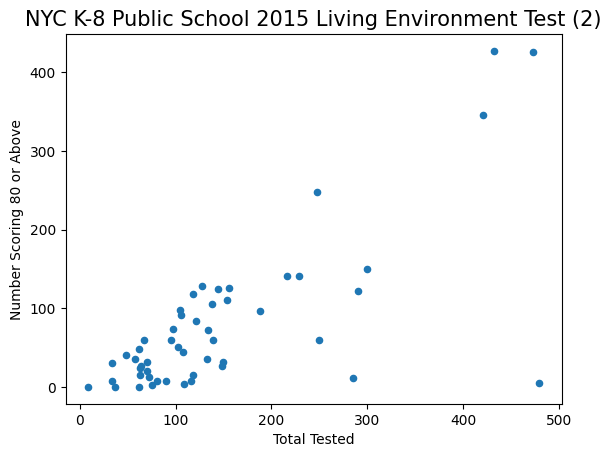

In [ ]:
df5.plot(kind='scatter', x='Total Tested', y="Number Scoring 80 or Above")
plt.title("NYC K-8 Public School 2015 Living Environment Test (2)",fontsize=15)


#Conclusion
Although the second scatter plot may seem appealing, the plot has a bias as a school with only students test cann not have more than 9 with a passign score of 80 or a above to compete with a school test 400+ students.
A better judegment would be to use the 1st scatter plot, which showed, that the size of the school did not have a major impact on whether a student will score 80 or above on the Living Environment Regents. 